<a href="https://colab.research.google.com/github/JesusCab/Data-Mining-Python/blob/main/Data-Mining-Tests-Avances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mineria De Datos - Jesus Adrian Caballero Nagaya**

---
1.- Adquisición de datos

2.- Limpieza de datos.

3.- Análisis de datos. 

4.- Graficación.

5.- Prueba de hipótesis. 

6.- Regresión lineal

7.- Predicciones



In [2]:
import requests
import io
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate
from typing import Tuple, List
import re
from datetime import datetime
import matplotlib.pyplot as plt

def get_soup(url: str) -> BeautifulSoup:
    response = requests.get(url)
    return BeautifulSoup(response.content, 'html.parser')

def get_csv_from_url(url:str) -> pd.DataFrame:
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))

def print_tabulate(df: pd.DataFrame):
    print(tabulate(df, headers=df.columns, tablefmt='orgtbl'))


df = get_csv_from_url("https://raw.githubusercontent.com/JesusCab/Data-Mining-Python/main/Car_Prices_Poland_Kaggle.csv")
df.head(500)



,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...,...
495,495,opel,antara,NaN,2008,295000,1991,Diesel,Żory,Śląskie,22900
496,496,opel,antara,NaN,2008,212000,1991,Diesel,Piła,Wielkopolskie,18900
497,497,opel,antara,NaN,2009,220122,1991,Diesel,Kraków,Małopolskie,26900
498,498,opel,antara,NaN,2008,172000,2405,Gasoline,Ostrówek,Łódzkie,29900


In [9]:
price_table = df["price"]
price_table

0          35900
1          78501
2          27000
3          30800
4          35900
           ...  
117922    222790
117923    229900
117924    135000
117925    154500
117926    130000
Name: price, Length: 117927, dtype: int64

In [10]:
gender_frame = pd.DataFrame(data=df['model'])
gender_frame

,model
0,combo
1,combo
2,combo
3,combo
4,combo
...,...
117922,xc-90
117923,xc-90
117924,xc-90
117925,xc-90


In [11]:
gender_frame = pd.DataFrame(data=df['price'])
gender_frame 
x=max(price_table)
y=min(price_table)
z= df["price"].mean()
w=df["price"].median()
m = df["price"].mode()
r=df["price"].count()
s=df["price"].sum()
k=df["price"].kurtosis()
v=df["price"].var()
d=df["price"].std()
print("Max {0}\n Min {1}\n Promedio {2}\n Mediana {3}\n moda {4}\n Conteo {5}\n Suma {6}\n Kutosis {7}\n Varianza {8}\n Desviacion Estandar {9}\n".format(x,y,z,w,m,r,s,k,v,d))


Max 2399900
 Min 500
 Promedio 70299.88479313474
 Mediana 41900.0
 moda 0    19900
dtype: int64
 Conteo 117927
 Suma 8290254514
 Kutosis 25.390107966360222
 Varianza 7195208997.487975
 Desviacion Estandar 84824.57779139237



In [12]:
g = df.groupby(['model','mark']).mean()
g

,,Unnamed: 0,year,mileage,vol_engine,price
model,mark,,,,,
147,alfa-romeo,80662.500,2004.750000,199146.218750,1743.937500,6929.531250
159,alfa-romeo,80774.500,2007.713542,222944.166667,1982.895833,17017.614583
2,mazda,97622.500,2011.075893,128518.066964,1411.049107,25803.669643
2008,peugeot,109254.500,2017.334821,63783.591518,1248.272321,68878.167411
206,peugeot,105718.500,2004.200000,178035.168750,1373.712500,6680.856250
...,...,...,...,...,...,...
xsara-picasso,citroen,84630.500,2005.500000,210990.906250,1689.718750,7785.395833
yaris,toyota,74086.500,2013.528125,109041.981250,1272.831250,38927.764583
yeti,skoda,80598.500,2012.604167,160701.468750,1603.093750,38448.010417


In [13]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


In [4]:
m = df['model']
m


0         combo
1         combo
2         combo
3         combo
4         combo
          ...  
117922    xc-90
117923    xc-90
117924    xc-90
117925    xc-90
117926    xc-90
Name: model, Length: 117927, dtype: object

AttributeError: ignored

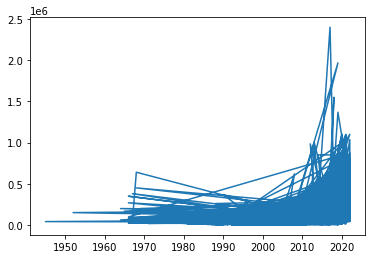

In [6]:
plt.plot(df['year'], df['price'], label='price').head(10)
plt.plot(df['year'], df['model'], label='model').head(10)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Popularidad de términos relacionados con IA')
plt.grid(True)


In [3]:
plt.bar(df['model'], df['price'], width=20)


<BarContainer object of 117927 artists>

Error in callback <function flush_figures at 0x7f07d8b613b0> (for post_execute):


KeyboardInterrupt: ignored